In [ ]:
# Goals
# 1. visualize decision tree
# 2. visualize data parameter 
# 3. compare accuracy between classification models

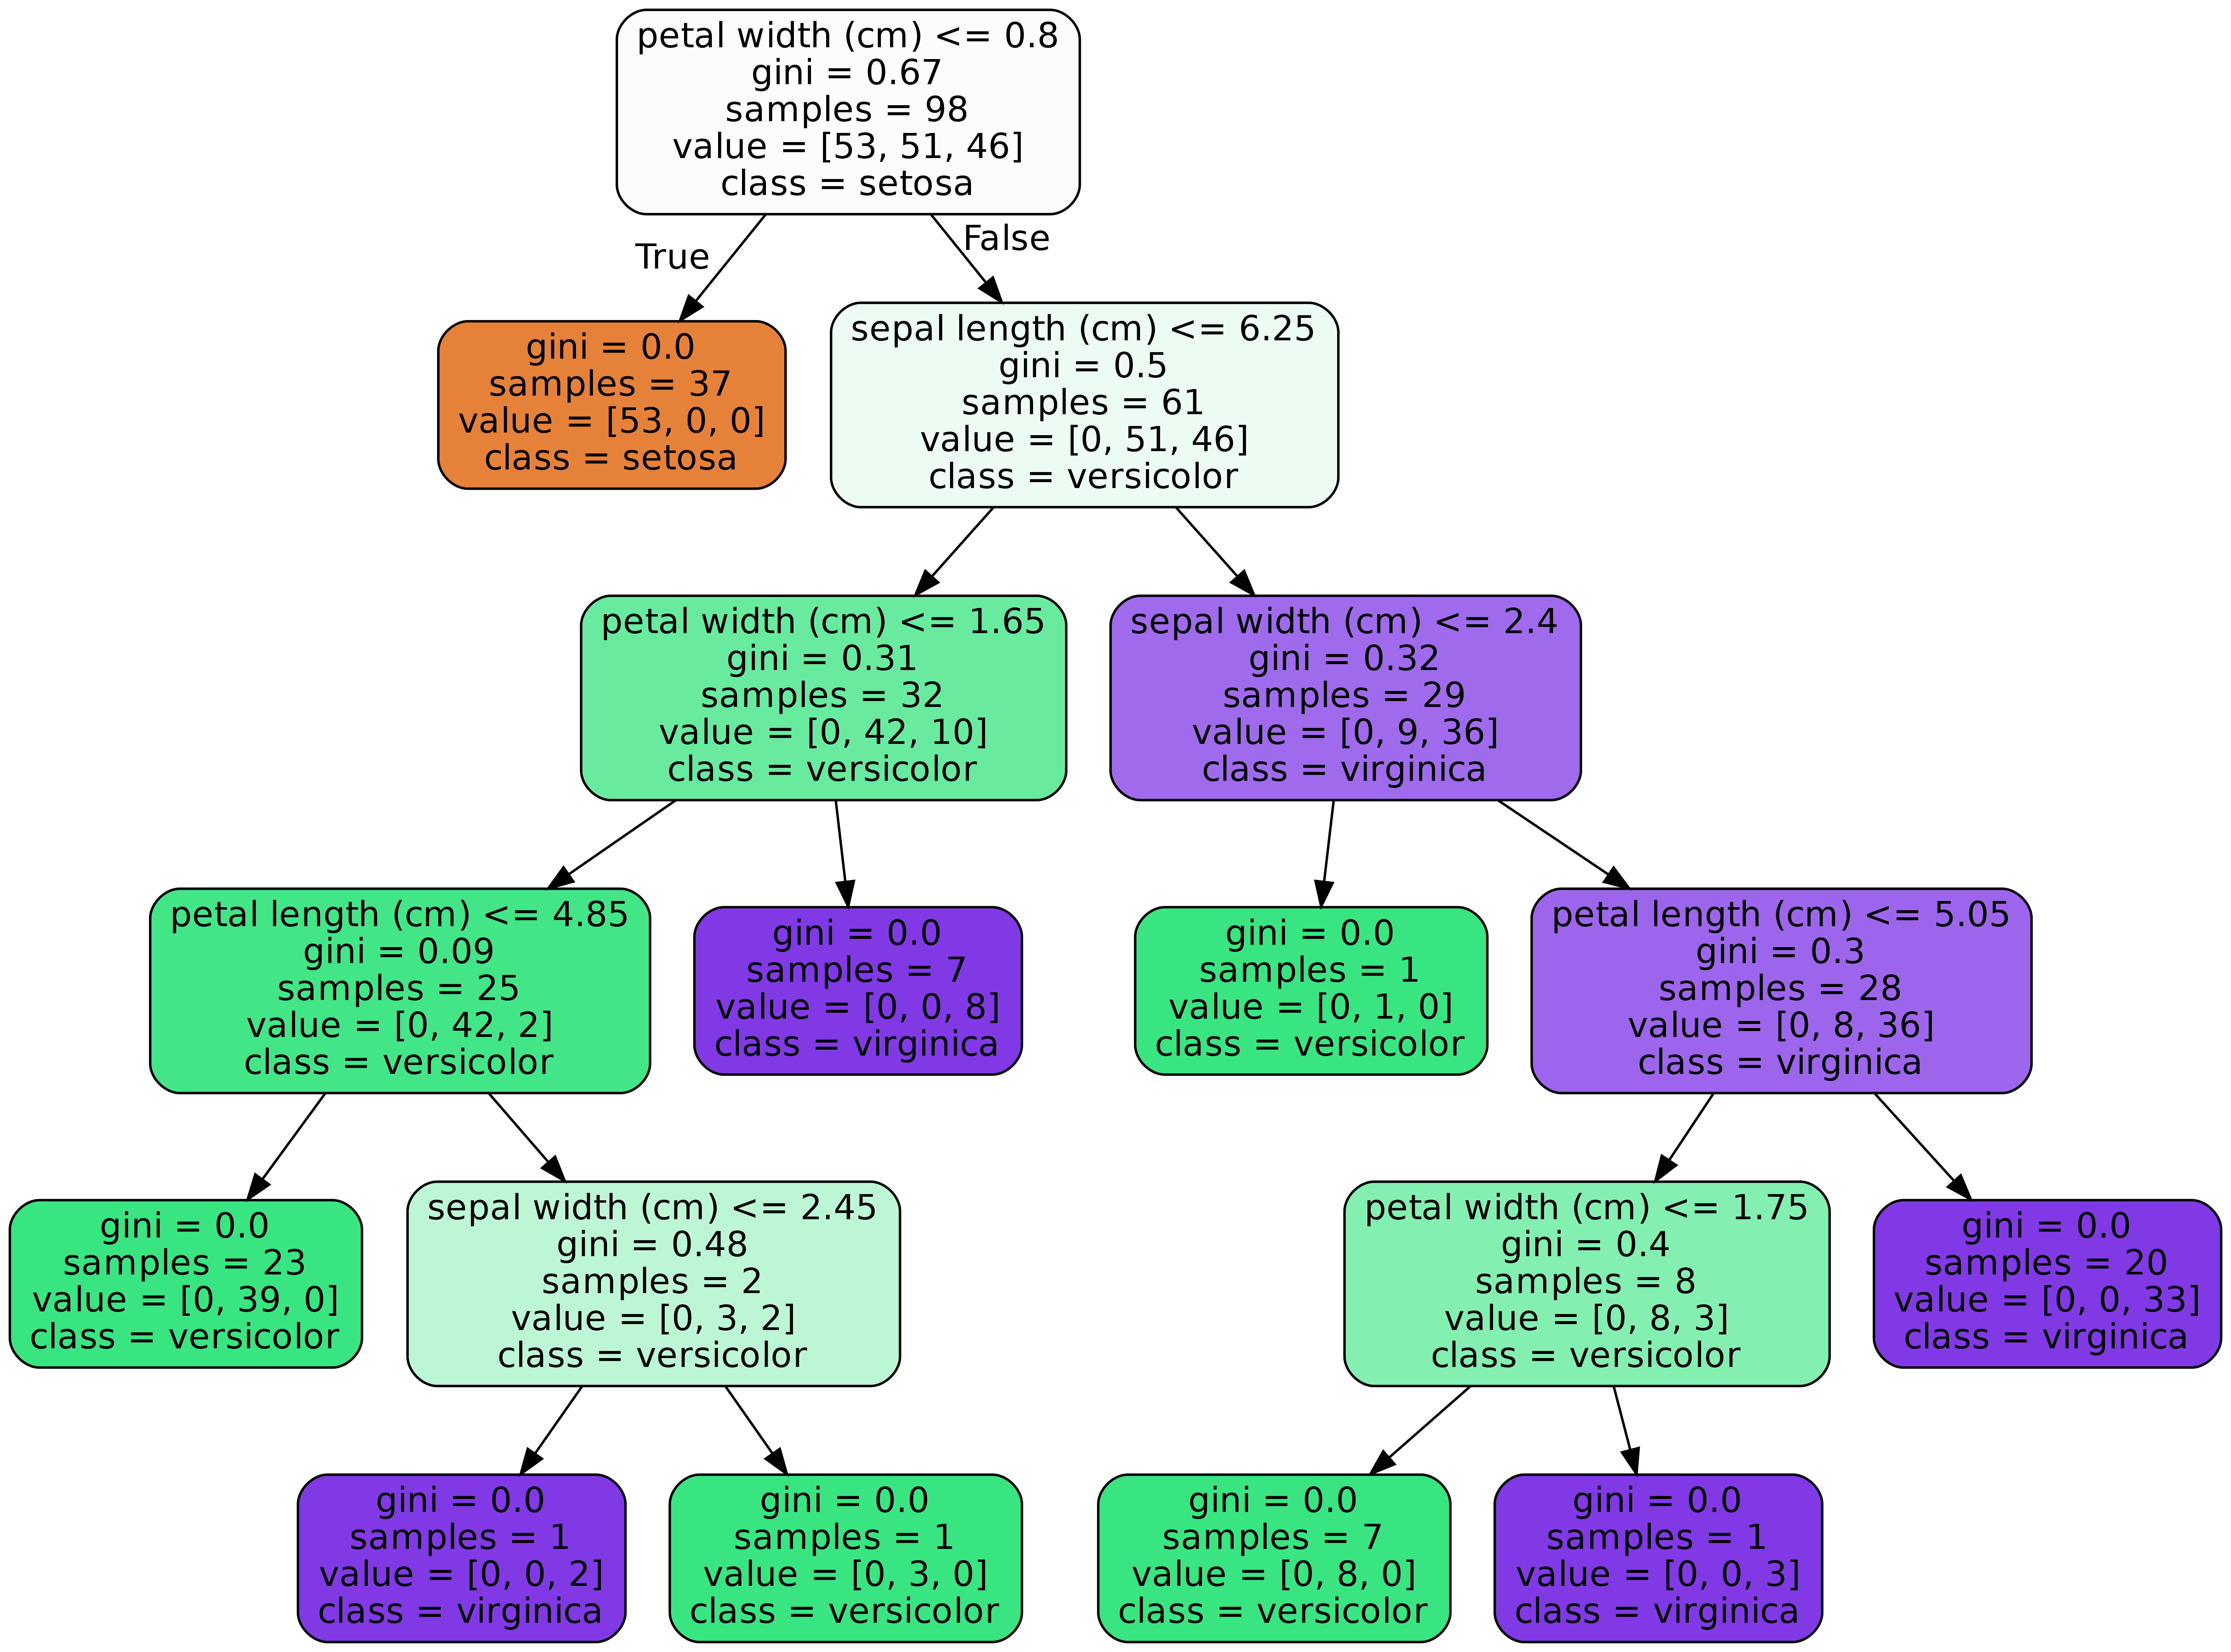

In [45]:
# Goal 1
"""
source: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
topic: How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn
data access: 9/23/19
author: Will Koehrsen

note: For dot function, We need to install 'Graphviz' using command
sudo apt install python-pydot python-pydot-ng graphviz
"""
# Import scikit-learn dataset library
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()

# Model A: (can also use single decision tree) 
from sklearn.ensemble import RandomForestClassifier 
modelA = RandomForestClassifier(n_estimators=100)

# 1.create a model train
modelA.fit(iris.data, iris.target) 
# Extract single tree
estimator = modelA.estimators_[5]

# 2. Export Tree as .dot file 
from sklearn.tree import export_graphviz 
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)
## n_estimator = # of tree in the forest

# 3. Convert dot to png using a system command
#import Graphviz
from subprocess import call 
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# 4. Visualize
# Display in jupyter notebook
from IPython.display import Image

Image(filename = 'tree.png')

# Note!: each tree look a bit different

In [41]:
# Goal 2.
"""
This section shows the data and its parameters

|Y|=K=3 classes: ['setosa' 'versicolor' 'virginica']
X in R^p, p = number of feature = 4: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
N = number of data set = 150
"""

data = pd.DataFrame(
    {
        "sepal length": iris.data[:, 0],
        "sepal width": iris.data[:, 1],
        "petal length": iris.data[:, 2],
        "petal width": iris.data[:, 3],
        "species": iris.target,
    }
) 
print(data.tail()) ## show only first 5 rows of data frame
# print the label species 
print(iris.target_names) ## [setosa, versicolor,virginica]
# print the names of the four features 
print(iris.feature_names) ## ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
     sepal length  sepal width  petal length  petal width  species
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
